In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF

# Function to calculate hypergeometric p-value at each position
def calculate_enrichment(ordered_gene_list, go_genes, universe_size):
    """
    Calculate hypergeometric enrichment for a GO term at each position in ordered list
    
    Parameters:
    - ordered_gene_list: list of genes in your ranking
    - go_genes: set of genes belonging to the GO term of interest
    - universe_size: total number of genes in your background universe
    
    Returns:
    - ranks: positions where GO genes are found
    - p_values: cumulative p-values at each position
    """
    # Convert GO genes to set for faster lookup
    go_genes_set = set(go_genes)
    
    # Find positions of GO term genes in the ordered list
    hits = []
    for i, gene in enumerate(ordered_gene_list):
        if gene in go_genes_set:
            hits.append(i)
    
    # Calculate hypergeometric p-values at each hit position
    p_values = []
    for i, hit_pos in enumerate(hits):
        # M = total GO genes, n = genes examined so far, k = hits found so far
        M = len(go_genes)
        n = hit_pos + 1  # Current position + 1 (since 0-indexed)
        k = i + 1        # Number of hits found so far
        
        # Calculate hypergeometric p-value
        p_value = stats.hypergeom.sf(k-1, universe_size, M, n)
        p_values.append(p_value)
    
    return hits, p_values

def plot_go_enrichment_ecdf(ordered_gene_list, go_genes, universe_size, go_term_name):
    """
    Create an ECDF plot for GO term enrichment with x and y axes switched
    
    Parameters:
    - ordered_gene_list: list of genes in your ranking
    - go_genes: set of genes belonging to the GO term of interest
    - universe_size: total number of genes in your background universe
    - go_term_name: name of the GO term (for the plot title)
    """
    # Calculate enrichment
    hits, p_values = calculate_enrichment(ordered_gene_list, go_genes, universe_size)
    
    # Convert to percentiles for the y-axis (previously x-axis)
    percentiles = [100 * (hit+1) / len(ordered_gene_list) for hit in hits]
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    
    # Plot with axes switched: -log10(p-values) on x-axis, percentiles on y-axis
    plt.plot(-np.log10(p_values), percentiles, 'b-', linewidth=2)
    plt.scatter(-np.log10(p_values), percentiles, color='blue', s=30)
    
 
    
    # Update axis labels to reflect the switch
    plt.ylabel('Percentile of Ranked Gene List (%)', fontsize=12)
    plt.xlabel('-log10(Hypergeometric P-value)', fontsize=12)
    plt.title(f'GO Enrichment ECDF: {go_term_name}', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    return plt

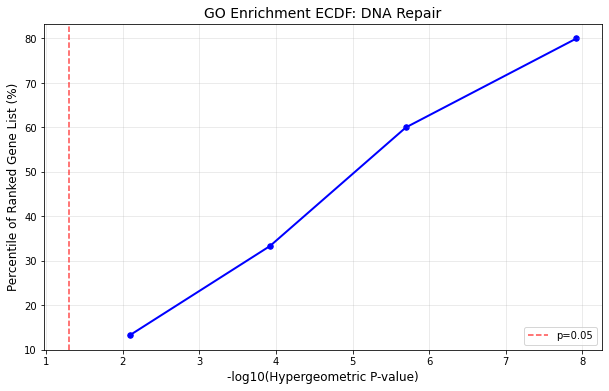

In [9]:
# Sample data (replace with your actual data)
# Your ordered gene list
ordered_genes = ['gene1', 'gene2', 'gene3', 'gene4', 'gene5', 'gene6', 'gene7', 'gene8', 
                'gene9', 'gene10', 'gene11', 'gene12', 'gene13', 'gene14', 'gene15']

# Genes in your GO term of interest
go_term_genes = ['gene2', 'gene5', 'gene9', 'gene12']

# Name of your GO term
go_term_name = "DNA Repair"

# Total genes in your universe (background)
universe_size = 1000

# Create and show the plot
plot = plot_go_enrichment_ecdf(ordered_genes, go_term_genes, universe_size, go_term_name)
#plt.savefig('go_enrichment_ecdf.png', dpi=300, bbox_inches='tight')
plt.show()

In [37]:
gene_dtw = pd.read_csv("/home/gilberthan/Desktop/disk2/202409_tooth/process/trajectory/20250414_epi_run_2/epi_conservation_score_diff.csv",index_col=0)
gene_list1 = gene_dtw["gene"]

In [38]:
gene_de = pd.read_csv("/home/gilberthan/Desktop/disk2/202409_tooth/process/trajectory/20250415_GO_downstream/20250415_epimarker_seurat_Filter.csv",index_col=0)
gene_de.sort_values(by="avg_log2FC",inplace=True,ascending=False)
gene_list2 = gene_de.index[0:198]


In [45]:
go1 = pd.read_csv("/home/gilberthan/Desktop/disk2/202409_tooth/process/trajectory/20250415_GO_downstream/GO/GO_biomineral_0070169.txt",index_col=0,sep="\t")
go2 = pd.read_csv("/home/gilberthan/Desktop/disk2/202409_tooth/process/trajectory/20250415_GO_downstream/GO/GO_odonto.txt",index_col=0,sep="\t")


In [53]:
goterm1 = go1.iloc[:,0].unique()
goterm2 = go2.iloc[:,0].unique()

/tmp/ipykernel_2913125/839239958.py:74: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<module 'matplotlib.pyplot' from '/home/gilberthan/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

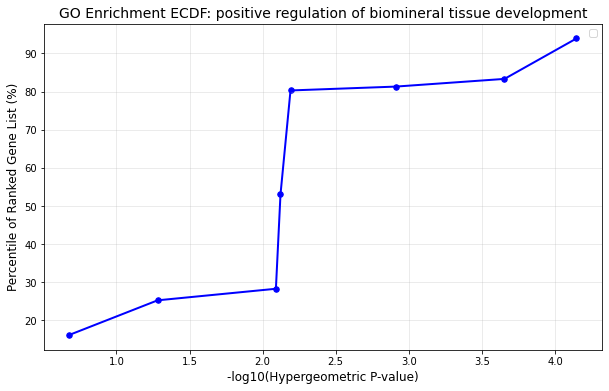

In [54]:
plot_go_enrichment_ecdf(gene_list1, goterm2, 20000, "positive regulation of biomineral tissue development")


/tmp/ipykernel_2913125/839239958.py:74: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<module 'matplotlib.pyplot' from '/home/gilberthan/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

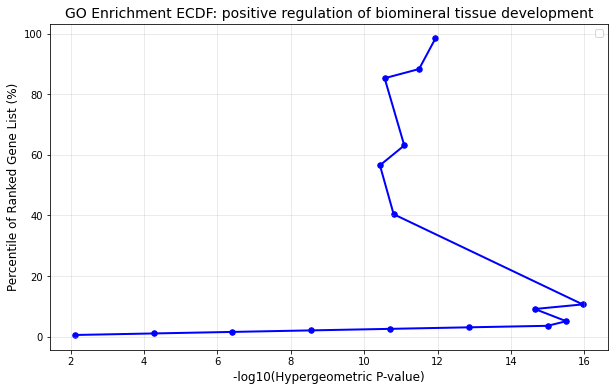

In [55]:
plot_go_enrichment_ecdf(gene_list2, goterm2, 20000, "positive regulation of biomineral tissue development")


/tmp/ipykernel_2913125/839239958.py:74: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<module 'matplotlib.pyplot' from '/home/gilberthan/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

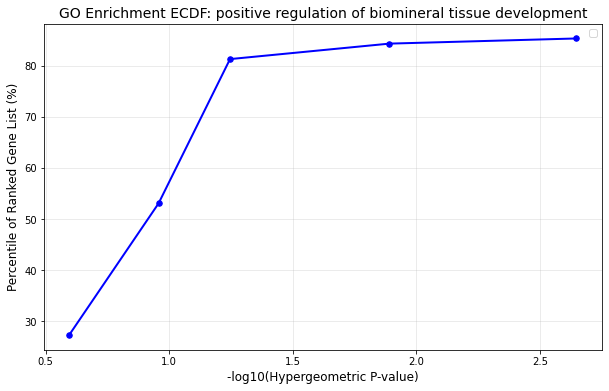

In [42]:
plot_go_enrichment_ecdf(gene_list1, goterm1, 20000, "positive regulation of biomineral tissue development")

/tmp/ipykernel_2913125/839239958.py:74: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<module 'matplotlib.pyplot' from '/home/gilberthan/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

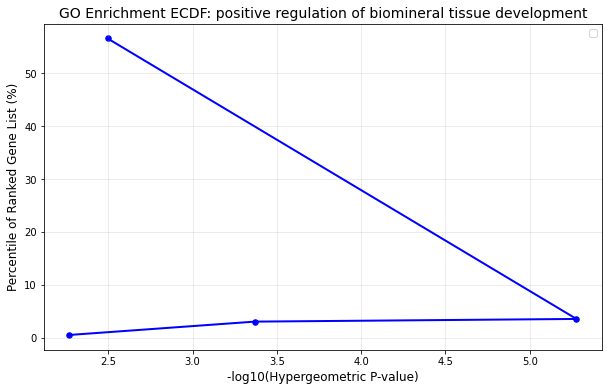

In [41]:
plot_go_enrichment_ecdf(gene_list2, goterm1, 20000, "positive regulation of biomineral tissue development")


In [21]:
gene_de.index[0:198]

Index(['Amtn', 'Mmp20', 'Ambn', 'Amelx', 'Klk4', 'Enam', 'Dspp', 'Calb1',
       'Nrn1l', 'Acp4',
       ...
       'Adamts17', 'Trpm7', 'Selenom', 'Ggt1', 'Proser2', 'Tyrobp', 'Phex',
       'Nupr1', 'Stox1', 'Rcn3'],
      dtype='object', length=198)

In [18]:
gene_list2 = list(gene_de.index).head(198)

AttributeError: 'list' object has no attribute 'head'